In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Users\Personal\OneDrive\Documents\Jupyter Notebook\Heart Disease Prediction (ML)\heart.csv", usecols=[0,3,13])
df.head(2)

,age,trestbps,target
0,63,145,1
1,37,130,1


# Train-Test Split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1),
                                                    df['target'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((212, 2), (91, 2))

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
scaler.mean_

array([ 54.51886792, 131.41981132])

In [10]:
X_train

,age,trestbps
137,62,128
106,69,160
284,61,140
44,39,140
139,64,128
...,...,...
251,43,132
192,54,120
117,56,120
47,47,138


In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [13]:
X_train_scaled

,age,trestbps
0,0.835114,-0.206649
1,1.616520,1.727014
2,0.723485,0.518475
3,-1.732361,0.518475
4,1.058373,-0.206649
...,...,...
207,-1.285844,0.035059
208,-0.057921,-0.690065
209,0.165338,-0.690065
210,-0.839326,0.397621


# Effect of Scaling

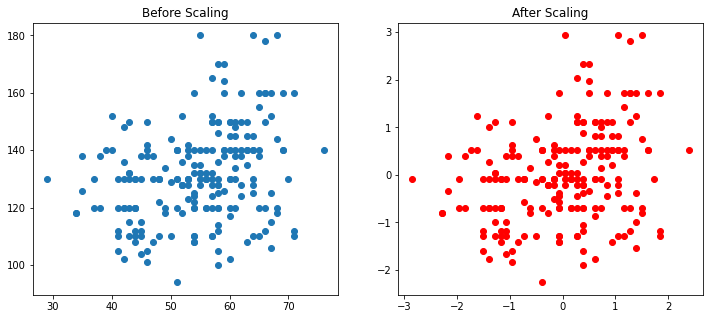

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['age'], X_train['trestbps'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['age'], X_train_scaled['trestbps'],color='red')
ax2.set_title("After Scaling")
plt.show()

# Inference:
1. The distribution is similiar, except the axis

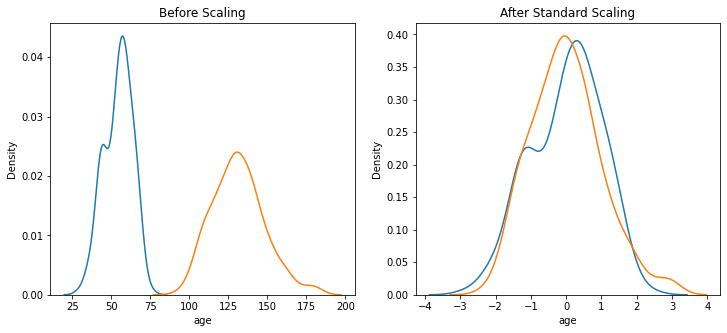

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['age'], ax=ax1)
sns.kdeplot(X_train['trestbps'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['age'], ax=ax2)
sns.kdeplot(X_train_scaled['trestbps'], ax=ax2)
plt.show()

# Comparison of Distributions

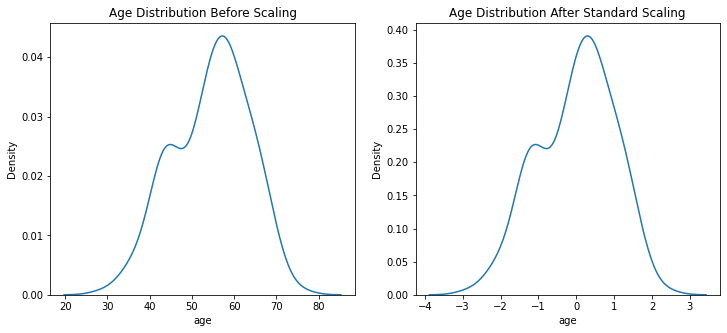

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['age'], ax=ax2)
plt.show()

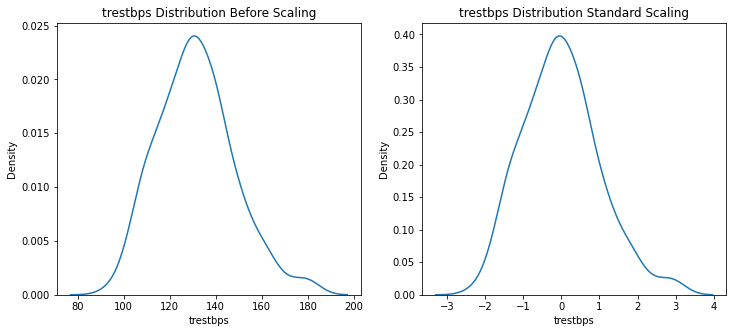

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('trestbps Distribution Before Scaling')
sns.kdeplot(X_train['trestbps'], ax=ax1)

# after scaling
ax2.set_title('trestbps Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['trestbps'], ax=ax2)
plt.show()

# Why scaling is important?

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [23]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [24]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.5604395604395604
Scaled 0.5714285714285714


In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [29]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [30]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [31]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.5494505494505495
Scaled 0.5274725274725275


In [32]:
df.describe()

,age,trestbps,target
count,303.000000,303.000000,303.000000
mean,54.366337,131.623762,0.544554
std,9.082101,17.538143,0.498835
min,29.000000,94.000000,0.000000
25%,47.500000,120.000000,0.000000
50%,55.000000,130.000000,1.000000
75%,61.000000,140.000000,1.000000
max,77.000000,200.000000,1.000000


In [33]:
X_train_scaled.describe()

,age,trestbps
count,2.120000e+02,2.120000e+02
mean,7.122185e-17,-8.274304e-17
std,1.002367e+00,1.002367e+00
min,-2.848655e+00,-2.261166e+00
25%,-7.556044e-01,-6.900645e-01
50%,1.653378e-01,-8.579489e-02
75%,7.234846e-01,5.184748e-01
max,2.397925e+00,2.935553e+00
